In [116]:
import pandas as pd
import numpy as np
import os
import shutil
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import mysql.connector
from mysql.connector import Error

import torch
import torch.nn as nn
import torch.optim as optim

In [117]:
def extract_cycle_substring(text, patern):
    
    match = re.search(pattern, text)
    if match:
        return match.group(0)
    else:
        return None

In [118]:
directory = r'C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\LSTM-keras\50um\1079714-2'

pattern_cycle = r'CYCLE\s(?:X{2}|X)\b'


xover_data = []


in_list = ['Polar', 
           'H2',
           'Datafile', 
           'CYCLE 1', 
           'CYCLE 2', 
           'CYCLE 3']

for file in os.listdir(directory):
    if file.endswith('.csv') and 'EIS' not in file and 'CV' not in file and '0BAR' not in file:
        if any(substring in file for substring in in_list):
            src = directory+ "\\" + file
            df = pd.read_csv(src,skiprows=17,dtype={'Unnamed: 0': object})
    #         df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], errors='coerce')
            df = df.drop(df.index[:2])
            df['path'] = file

            cycle = re.search(pattern_cycle, file)
    #         df['cycle'] = cycle

            xover_data.append(df)


            print(src)

xover_data = pd.concat(xover_data)
xover_data

C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\LSTM-keras\50um\1079714-2\1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 240619 173806.csv
C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\LSTM-keras\50um\1079714-2\1079714-2 ~ E60#B ~ 2 ~ CYCLE 1 ~ AN 2BAR 80C, CA 28.5BAR ~ Current Polar Down ~ 240621 044056.csv
C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\LSTM-keras\50um\1079714-2\1079714-2 ~ E60#B ~ 2 ~ CYCLE 1 ~ AN 2BAR 80C, CA 28.5BAR ~ Current Polar Up ~ 240621 033619.csv
C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\LSTM-keras\50um\1079714-2\1079714-2 ~ E60#B ~ 2 ~ CYCLE 1 ~ AN 2BAR 80C, CA 28.5BAR ~ H2 XOver ~ 240621 060546.csv
C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\LSTM-keras\50um\1079714-2\1079714-2 ~ E60#B ~ 2 ~ Datafile_Analyser ~ 240621 080444.csv
C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\LSTM-keras\50um\1079714-2\1079714-2 ~ E60#B ~ 3 ~ CYCLE 1 ~ AN 2BAR 80C, CA 28.5BAR ~ Break in condit

,Time Stamp,Elapsed Time,File Mark,voltage,current,current_density,temp_anode_inlet_set,temp_anode_inlet,temp_anode_outlet,temp_cathode_inlet_set,...,signal_in_e_stop,path,pressure_anode_inlet,pressure_cathode_inlet,pressure_cathode_outlet,signal_in_h2_in_o2_sensor,signal_in_o2_in_h2_sensor,Gamry-01.voltage,Gamry-01.current,Gamry-01.current_density
2,2024-06-19 17:39:30.005,83.917,NaN,-0.01138,0.01384,0.000266,70.0,49.593044,43.219200,0.0,...,1.0,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-06-19 17:40:00.005,113.917,NaN,-0.01233,0.01330,0.000277,70.0,54.440155,47.928341,0.0,...,1.0,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-19 17:40:30.005,143.917,NaN,-0.01233,0.01277,0.000255,70.0,58.592991,51.698734,0.0,...,1.0,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-06-19 17:41:00.005,173.917,NaN,-0.01233,0.01224,0.000245,70.0,61.780430,54.901581,0.0,...,1.0,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-06-19 17:41:30.005,203.917,NaN,-0.01233,0.01224,0.000266,70.0,63.996456,57.244316,0.0,...,1.0,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,2024-06-22 19:20:00.005,48183.218,NaN,1.54300,14.99716,0.299943,80.0,80.021370,77.701607,0.0,...,1.0,"1079714-2 ~ E60#B ~ 3 ~ CYCLE 3 ~ AN 6BAR 80C,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1607,2024-06-22 19:20:30.005,48213.218,END_OF_XOVER,1.54394,14.99609,0.299922,80.0,80.032341,77.773697,0.0,...,1.0,"1079714-2 ~ E60#B ~ 3 ~ CYCLE 3 ~ AN 6BAR 80C,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1608,2024-06-22 19:21:00.005,48243.218,NaN,1.53067,11.96750,0.239350,80.0,80.015884,77.738014,0.0,...,1.0,"1079714-2 ~ E60#B ~ 3 ~ CYCLE 3 ~ AN 6BAR 80C,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1609,2024-06-22 19:21:30.005,48273.218,NaN,1.51549,8.99550,0.179910,80.0,80.015884,77.689445,0.0,...,1.0,"1079714-2 ~ E60#B ~ 3 ~ CYCLE 3 ~ AN 6BAR 80C,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
xover_data_copy = xover_data.copy()

xover_data_copy = xover_data_copy[['Time Stamp',
                                   'current',
                                   'voltage',
                                   'signal_in_h2_in_o2_sensor',
                                   'beck.b1.m11.ch1',
                                  'path']]



xover_data_copy = xover_data_copy.sort_values(by='Time Stamp')


xover_data_copy['Time Stamp'] = pd.to_datetime(xover_data_copy['Time Stamp'], format='%Y/%m/%d %H:%M:%S.%f')

xover_data_copy['time_diff'] = xover_data_copy['Time Stamp'].diff().dt.total_seconds().fillna(0) * 1000
xover_data_copy['time_running_total'] = xover_data_copy['time_diff'].cumsum()

xover_data_copy = xover_data_copy[['time_running_total',
                                   'current', 'voltage', 
                                   'signal_in_h2_in_o2_sensor', 
                                   'beck.b1.m11.ch1',
                                   'path'
                                  ]]




xover_data_copy['signal_in_h2_in_o2_sensor'] = xover_data_copy.apply(
    lambda row: row['beck.b1.m11.ch1'] if pd.isna(row['signal_in_h2_in_o2_sensor']) else row['signal_in_h2_in_o2_sensor'], axis=1
)

# xover_data_copy = xover_data_copy.dropna()
xover_data_copy 

,time_running_total,current,voltage,signal_in_h2_in_o2_sensor,beck.b1.m11.ch1,path
2,0.0,0.01384,-0.01138,-0.400000,-0.400000,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...
3,30000.0,0.01330,-0.01233,-0.400000,-0.400000,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...
4,60000.0,0.01277,-0.01233,-0.400000,-0.400000,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...
5,90000.0,0.01224,-0.01233,-0.400000,-0.400000,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...
6,120000.0,0.01224,-0.01233,-0.400000,-0.400000,1079714-2 ~ E60#B ~ 1 ~ Datafile_Analyser ~ 24...
...,...,...,...,...,...,...
4263,266220000.0,0.01117,-0.00569,1.001801,1.001801,1079714-2 ~ E60#B ~ 2 ~ Datafile_Analyser ~ 24...
4264,266250000.0,0.01064,-0.00474,1.001801,1.001801,1079714-2 ~ E60#B ~ 2 ~ Datafile_Analyser ~ 24...
4265,266280000.0,0.01010,-0.00474,1.001801,1.001801,1079714-2 ~ E60#B ~ 2 ~ Datafile_Analyser ~ 24...
4266,266310000.0,0.01117,-0.00474,1.001801,1.001801,1079714-2 ~ E60#B ~ 2 ~ Datafile_Analyser ~ 24...


In [135]:
# add the cycle number to the dataframe
pattern = r'CYCLE\s\d{1,2}\b'
xover_data_copy['cycle'] = xover_data_copy['path'].apply(lambda x: extract_cycle_substring(x, pattern))

pattern = r'CYCLE\s\d{1,2}\s(.*?)\s-\s'
xover_data_copy['test'] = xover_data_copy['path'].apply(lambda x: extract_cycle_substring(x, pattern))
# xover_data_copy['test'] = xover_data_copy['test'].astype(str).str[8:-3]
# xover_data_copy['test'] = xover_data_copy['test'].str.lstrip()






xover_data_copy = xover_data_copy[xover_data_copy['cycle'].notna()]

xover_data_copy = xover_data_copy[['time_running_total',
                                   'current', 'voltage', 
                                   'signal_in_h2_in_o2_sensor', 
                                   'beck.b1.m11.ch1',
#                                    'path',
                                   'cycle',
                                   'test'
                                  ]]
xover_data_copy

,time_running_total,current,voltage,signal_in_h2_in_o2_sensor,beck.b1.m11.ch1,cycle,test
2,122212000.0,0.01010,1.14942,0.303146,NaN,CYCLE 1,None
3,122213000.0,0.01010,1.14942,0.303146,NaN,CYCLE 1,None
4,122214000.0,0.01010,1.15037,0.303146,NaN,CYCLE 1,None
5,122215000.0,0.01064,1.15037,0.303146,NaN,CYCLE 1,None
6,122216000.0,0.01064,1.15037,0.304709,NaN,CYCLE 1,None
...,...,...,...,...,...,...,...
1606,265230000.0,14.99716,1.54300,0.976800,0.9768,CYCLE 3,None
1607,265260000.0,14.99609,1.54394,0.976800,0.9768,CYCLE 3,None
1608,265290000.0,11.96750,1.53067,0.976800,0.9768,CYCLE 3,None
1609,265320000.0,8.99550,1.51549,0.976800,0.9768,CYCLE 3,None


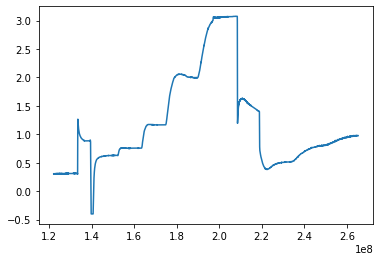

In [133]:
import matplotlib.pyplot as plt
plt.plot(xover_data_copy['time_running_total'], xover_data_copy['signal_in_h2_in_o2_sensor'])

In [88]:
xover_data_copy.describe()

,time_running_total,current,voltage,beck.b1.m11.ch3
count,3.809000e+03,3809.000000,3809.000000,3809.000000
mean,1.982733e+08,54.486241,1.654145,3.620104
std,4.078300e+07,45.882010,0.173431,3.300389
min,1.312500e+08,0.010100,-0.005690,0.495621
25%,1.623000e+08,19.024600,1.545840,0.783715
50%,1.908600e+08,25.025190,1.592310,2.236702
75%,2.367900e+08,99.941810,1.772500,5.470138
max,2.653500e+08,150.007220,2.003900,10.000000


In [64]:
xover_data_copy.to_csv('xover_data_copy.csv')

In [4]:

xover_data_copy = xover_data.copy()




# rename the dateTime column
xover_data_copy = xover_data_copy.rename(columns = {'Unnamed: 0':'dateTime'}) 
xover_data_copy['dateTime'] = pd.to_datetime(xover_data_copy['dateTime'], format='%Y/%m/%d %H:%M:%S.%f')
xover_data_copy=xover_data_copy.sort_values(by='dateTime')



# add the cycle number to the dataframe
pattern = r'CYCLE\s\d{1,2}\b'
xover_data_copy['cycle'] = xover_data_copy['path'].apply(lambda x: extract_cycle_substring(x, pattern))

# add the test to the dataframe
pattern = r'CYCLE\s\d{1,2}\s(.*?)\s-\s'
xover_data_copy['test'] = xover_data_copy['path'].apply(lambda x: extract_cycle_substring(x, pattern))
xover_data_copy['test'] = xover_data_copy['test'].astype(str).str[8:-3]
xover_data_copy['test'] = xover_data_copy['test'].str.lstrip()


# get date from the datetime
xover_data_copy['date'] = xover_data_copy['dateTime'].astype(str).str[:10]




xover_data_copy['current_density']=xover_data_copy['current_density'].astype(float)
xover_data_copy['path'] = xover_data_copy['path'].astype(str)



to_drop = ['path']
xover_data_copy.drop(to_drop,axis=1 ,inplace=True)

# xover_data_copy= xover_data_copy.drop(xover_data_copy.index[:2])
xover_data_copy['test'].unique()


array(['Datafile Analyser', 'Dry Conditioning', 'Current Polar Up',
       'Current Polar Down', 'EIS 1.2 A cm-2', 'EIS 0.6 A cm-2',
       'EIS 0.1 A cm-2', 'CV', '3A 24-Hour Current Hold', 'H2 XOver',
       'Post ESTOP Dry Conditioning'], dtype=object)

In [5]:
test_name = xover_data_copy['test'].unique().tolist()
test_name

['Datafile Analyser',
 'Dry Conditioning',
 'Current Polar Up',
 'Current Polar Down',
 'EIS 1.2 A cm-2',
 'EIS 0.6 A cm-2',
 'EIS 0.1 A cm-2',
 'CV',
 '3A 24-Hour Current Hold',
 'H2 XOver',
 'Post ESTOP Dry Conditioning']

In [6]:
data_frame_of_tests = []

for test in test_name:
    sub_df = xover_data_copy.loc[xover_data_copy['test'] == test]
    columns_to_drop = sub_df.columns[sub_df.isnull().all()]
    sub_df.drop(columns=columns_to_drop, inplace=True)
    

    
    data_frame_of_tests.append(sub_df)
    
    

C:\Users\whiter04\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
# combine tests

Datafile_Analyser = data_frame_of_tests[0]
Dry_Conditioning = data_frame_of_tests[1]
Current_Polar_Up = data_frame_of_tests[2]
Current_Polar_Down = data_frame_of_tests[3]

h_2_cross_over = data_frame_of_tests[-2]
current_hold = data_frame_of_tests[-3]

dfs = [Datafile_Analyser, 
       Dry_Conditioning, 
       Current_Polar_Up, 
       Current_Polar_Down, 
       h_2_cross_over,
       current_hold, 
       Datafile_Analyser]


master_data_frame = pd.concat(dfs).sort_values(by='dateTime')



# Calculate the difference between each datetime value and the running total of the time difference
master_data_frame['time_diff'] = master_data_frame['dateTime'].diff().dt.total_seconds().fillna(0) * 1000
master_data_frame['time_running_total'] = master_data_frame['time_diff'].cumsum()





to_drop = ['Unnamed: 1',
           'Unnamed: 2',
           'time_diff',
          'cycle',
          'test',
          'date',
          'dateTime']

master_data_frame = master_data_frame.drop(to_drop, axis=1).astype(float)


master_data_frame

,cell_voltage_001,current,current_density,temp_anode_inlet_set,temp_anode_inlet,temp_anode_outlet,temp_cathode_inlet_set,temp_cathode_inlet,temp_cathode_outlet,pressure_anode_set,...,pressure_cathode_outlet,flow_anode_di_water_supply_set,flow_anode_di_water_supply,flow_cathode_di_water_supply_set,flow_cathode_di_water_supply,signal_in_resistivity_anode,signal_in_resistivity_cathode,signal_in_h2_in_o2_sensor,signal_in_o2_in_h2_sensor,time_running_total
2,-0.095167,-0.01262,-0.000505,70.0,22.524658,22.211363,0.0,22.943993,22.664978,0.0,...,-0.009439,0.3,0.149858,0.0,0.0,0.142337,0.580925,0.278146,10.0,0.000000e+00
2,-0.095167,-0.01262,-0.000505,70.0,22.524658,22.211363,0.0,22.943993,22.664978,0.0,...,-0.009439,0.3,0.149858,0.0,0.0,0.142337,0.580925,0.278146,10.0,0.000000e+00
2,-0.095167,-0.01262,-0.000505,70.0,22.524658,22.211363,0.0,22.943993,22.664978,0.0,...,-0.009439,0.3,0.149858,0.0,0.0,0.142337,0.580925,0.278146,10.0,0.000000e+00
3,-0.095167,-0.01192,-0.000477,70.0,23.574999,22.622944,0.0,22.930300,22.651320,0.0,...,-0.001021,0.3,0.270174,0.0,0.0,0.132591,0.585798,0.276583,10.0,3.000000e+04
3,-0.095167,-0.01192,-0.000477,70.0,23.574999,22.622944,0.0,22.930300,22.651320,0.0,...,-0.001021,0.3,0.270174,0.0,0.0,0.132591,0.585798,0.276583,10.0,3.000000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,1.879790,75.00482,3.000193,80.0,79.819145,78.329117,0.0,29.627552,34.574463,2.0,...,6.019177,0.3,0.300858,0.0,0.0,0.230055,0.152083,0.104703,10.0,4.934550e+09
1739,1.879790,75.00482,3.000193,80.0,79.819145,78.329117,0.0,29.627552,34.574463,2.0,...,6.019177,0.3,0.300858,0.0,0.0,0.230055,0.152083,0.104703,10.0,4.934550e+09
1740,1.880171,75.00482,2.999912,80.0,79.819145,78.354111,0.0,29.627552,34.560806,2.0,...,5.960248,0.3,0.300858,0.0,0.0,0.215435,0.156957,0.103140,10.0,4.934580e+09
871,1.880171,75.00482,2.999912,80.0,79.819145,78.354111,0.0,29.627552,34.560806,2.0,...,5.960248,0.3,0.300858,0.0,0.0,0.215435,0.156957,0.103140,10.0,4.934580e+09


In [9]:
master_data_frame.to_csv('master_data_frame.csv')